In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.mplot3d import Axes3D

In [5]:
data = Dataset("Complete_TAVG_LatLong1.nc", "r", format="NETCDF4")

In [6]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: Berkeley Earth Internal Convention (based on CF-1.5)
    title: Gridded Berkeley Earth Surface Temperature Anomaly Field
    history: 16-Jan-2020 06:53:53
    institution: Berkeley Earth Surface Temperature Project
    source_file: Complete_TAVG.50985s.20200116T064041.mat
    source_history: 13-Jan-2020 17:22:52
    source_code_version: ca6f26341938dae0ea7dd619bce6f15e
    comment: This file contains surface temperature anomaly field gridded on a 1� (longitude) by 1� (latitude) grid-box basis.
    dimensions(sizes): longitude(360), latitude(180), time(3240), month_number(12)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), float64 time(time), float64 land_mask(latitude,longitude), float32 temperature(time,latitude,longitude), float32 climatology(month_number,latitude,longitude)
    groups: 

In [7]:
data.variables

OrderedDict([('longitude', <class 'netCDF4._netCDF4.Variable'>
              float32 longitude(longitude)
                  units: degrees_east
                  standard_name: longitude
                  long_name: Longitude
              unlimited dimensions: 
              current shape = (360,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('latitude', <class 'netCDF4._netCDF4.Variable'>
              float32 latitude(latitude)
                  units: degrees_north
                  standard_name: latitude
                  long_name: Latitude
              unlimited dimensions: 
              current shape = (180,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time', <class 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  units: year A.D.
                  standard_name: time
                  long_name: Time
              unlimited dimensions: time
           

In [8]:
for i in data.variables:
    print (i)

longitude
latitude
time
land_mask
temperature
climatology


In [9]:
data.variables['longitude']

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    standard_name: longitude
    long_name: Longitude
unlimited dimensions: 
current shape = (360,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [10]:
data.variables['longitude'][:]

masked_array(data=[-179.5, -178.5, -177.5, -176.5, -175.5, -174.5, -173.5,
                   -172.5, -171.5, -170.5, -169.5, -168.5, -167.5, -166.5,
                   -165.5, -164.5, -163.5, -162.5, -161.5, -160.5, -159.5,
                   -158.5, -157.5, -156.5, -155.5, -154.5, -153.5, -152.5,
                   -151.5, -150.5, -149.5, -148.5, -147.5, -146.5, -145.5,
                   -144.5, -143.5, -142.5, -141.5, -140.5, -139.5, -138.5,
                   -137.5, -136.5, -135.5, -134.5, -133.5, -132.5, -131.5,
                   -130.5, -129.5, -128.5, -127.5, -126.5, -125.5, -124.5,
                   -123.5, -122.5, -121.5, -120.5, -119.5, -118.5, -117.5,
                   -116.5, -115.5, -114.5, -113.5, -112.5, -111.5, -110.5,
                   -109.5, -108.5, -107.5, -106.5, -105.5, -104.5, -103.5,
                   -102.5, -101.5, -100.5,  -99.5,  -98.5,  -97.5,  -96.5,
                    -95.5,  -94.5,  -93.5,  -92.5,  -91.5,  -90.5,  -89.5,
                    -88.5

In [11]:
np.shape(data.variables['longitude'][:])

(360,)

In [12]:
np.shape(data.variables['latitude'][:])

(180,)

In [10]:
np.shape(data.variables['temperature'][:])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.


(3240, 180, 360)

In [11]:
np.shape(data.variables['climatology'])

(12, 180, 360)

In [12]:
np.shape(data.variables['time'])

(3240,)

In [13]:
data.variables['temperature'].missing_value

nan

In [3]:
type(data.variables['temperature'][1,1,1])

NameError: name 'data' is not defined

In [16]:
print(data.variables['climatology'][1,1,10])

-40.23172


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.


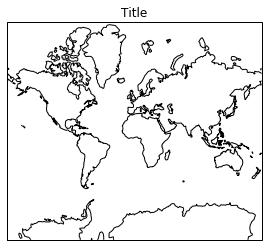

In [17]:
%matplotlib inline
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cf                 # import features
ax = plt.axes(projection = ccrs.Mercator())  # create a set of axes with Mercator projection
ax.add_feature(cf.COASTLINE)                 # plot some data on them
ax.set_title("Title")                        # label it
plt.show()

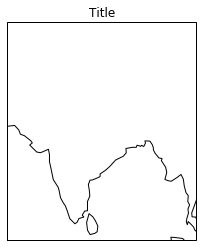

In [19]:
ax = plt.axes(projection = ccrs.Mercator())  # create a set of axes with Mercator projection
ax.set_extent([65, 100, 5, 40])  
ax.add_feature(cf.COASTLINE)                 # plot some data on them
ax.set_title("Title")                        # label it
plt.show()

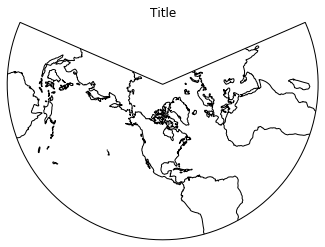

In [20]:
ax = plt.axes(projection = ccrs.LambertConformal())  
ax.add_feature(cf.COASTLINE)                 
ax.set_title("Title")                        
plt.show()

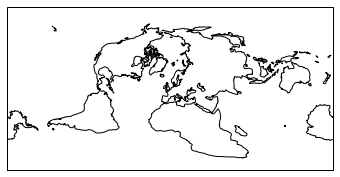

In [21]:
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

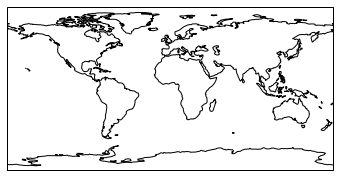

In [74]:
# The data are defined in lat/lon coordinate system, so PlateCarree()
# is the appropriate choice:
data_crs = ccrs.PlateCarree()

# The projection keyword determines how the plot will look
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

#ax.contourf(lon, lat, data, transform=data_crs)
#plt.show()

In [22]:
lat =data.variables['latitude']

In [23]:
lon= data.variables['longitude']


In [26]:
data_temp= data.variables['climatology'][1,:,:]

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.


In [25]:
np.shape(data_temp)

(180, 360)

In [162]:
data.variables['temperature']

<class 'netCDF4._netCDF4.Variable'>
float32 temperature(time, latitude, longitude)
    units: degree C
    standard_name: surface_temperature_anomaly
    long_name: Air Surface Temperature Anomaly
    missing_value: nan
    valid_min: -16.286027484366354
    valid_max: 17.95838745876422
unlimited dimensions: time
current shape = (3240, 180, 360)
filling on, default _FillValue of 9.969209968386869e+36 used

In [161]:

    #for i in range(0, 12):
    temp = data.variables['climatology'][11][0][0]
    print(temp)


-26.782993


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  


ko=data.variables['time'][1]
ko

In [ ]:
for i in range(0,11):
    for j in range(0,180):
        for k in range(0,360):
            temp = data.variables['climatology'][i][j][k]
            ax.scatter(temp, j, k, marker='o')
            
    


plt.xlabel('time')
plt.ylabel('temperature')
plt.title('scatter plot of time')
plt.show()